Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [98]:
# Import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier

### Load the dataset 

In [4]:
pd.set_option('display.max_columns', 24)

In [5]:
df=pd.read_csv('dataset.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [44]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [7]:
df.status.value_counts(normalize=True)*100

1    75.384615
0    24.615385
Name: status, dtype: float64

There is no Imbalance in the class.. Out of entire population 75% population is affected with Parkinson's Disease.

### Checking for missing vaues 

In [9]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

 As we can see there is No missing values in the Dataset 

## Dropping Name Feature as its useless for our analysis

In [10]:
df.drop(columns='name',inplace=True)

In [11]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

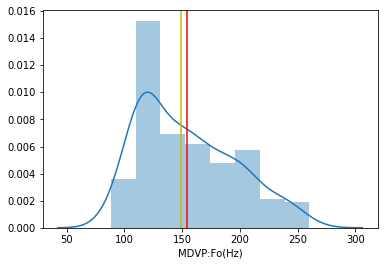

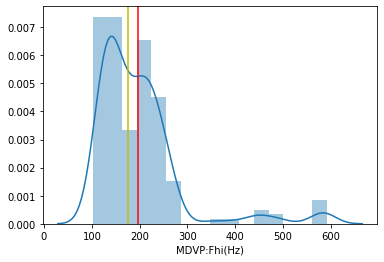

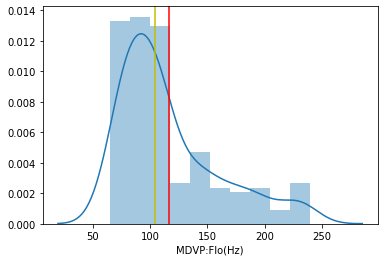

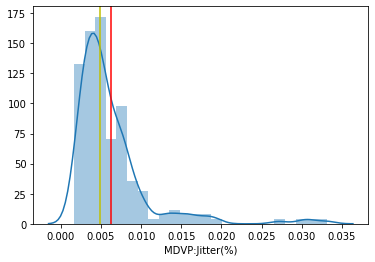

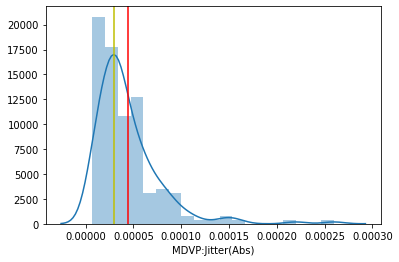

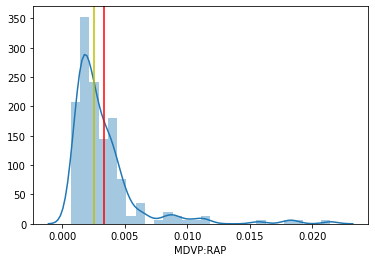

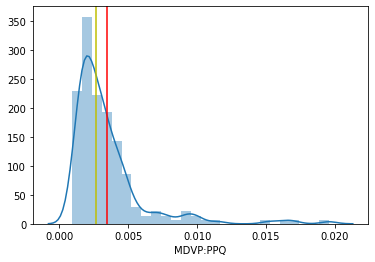

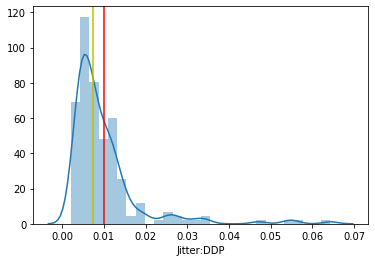

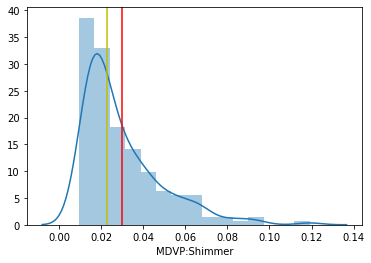

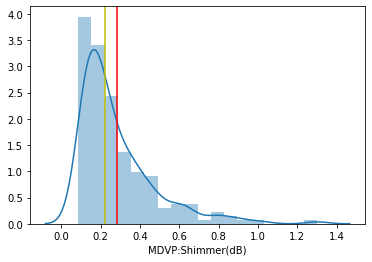

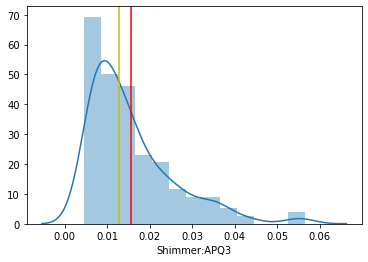

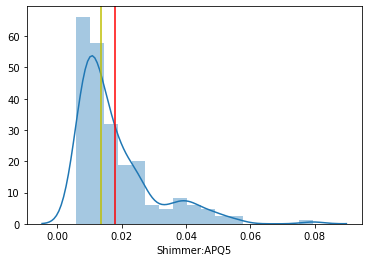

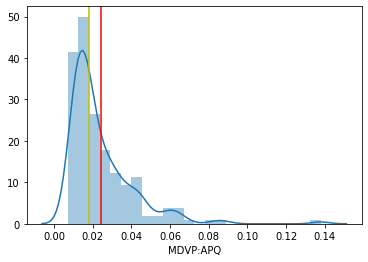

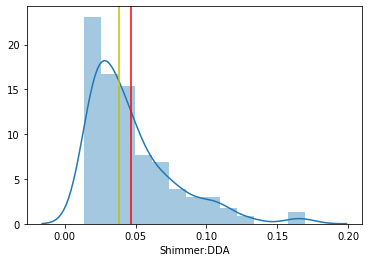

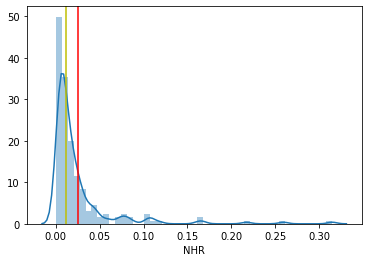

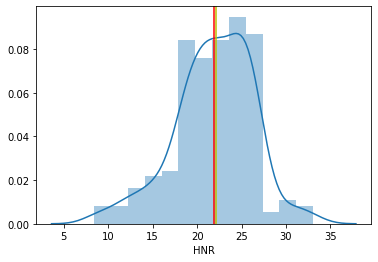

C:\Users\Vignesh\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


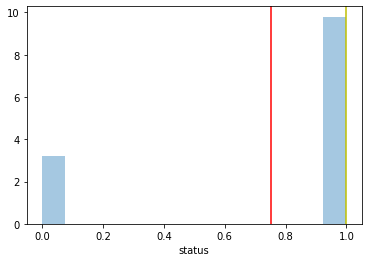

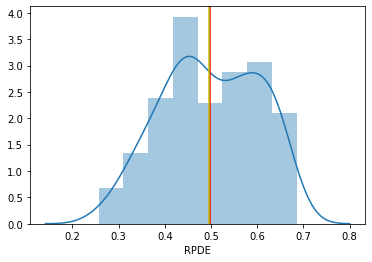

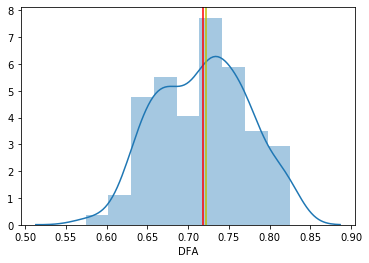

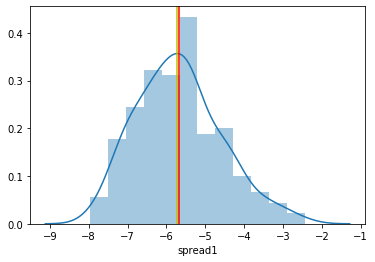

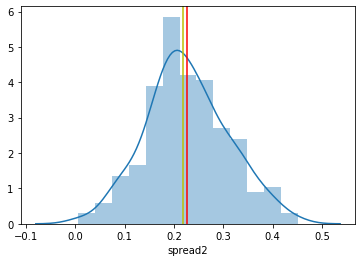

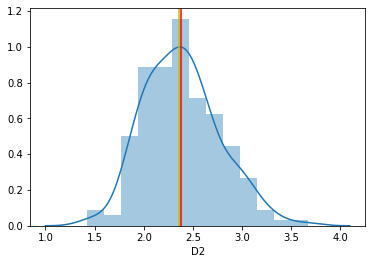

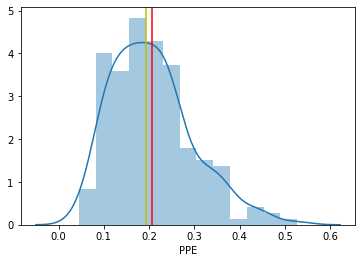

In [14]:
for i in df.columns:
    sns.distplot(df[i])
    plt.axvline(df[i].mean(),color='r')
    plt.axvline(df[i].median(),color='y')
    plt.show()

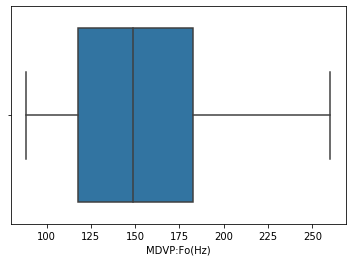

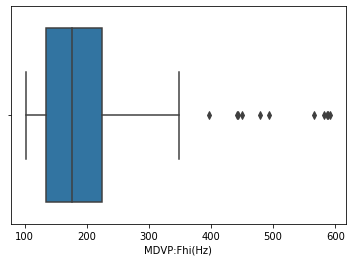

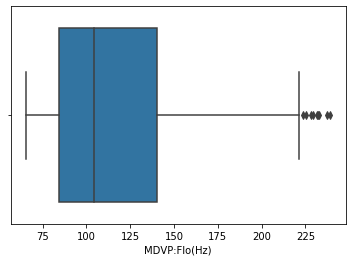

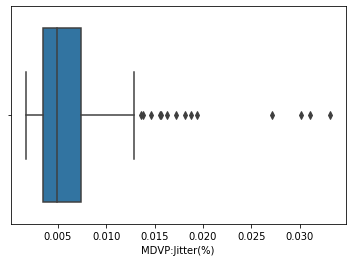

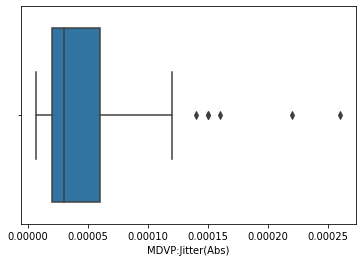

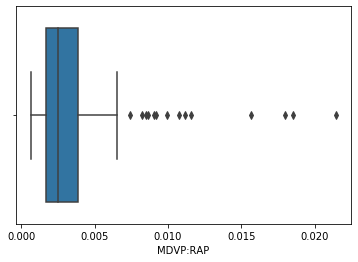

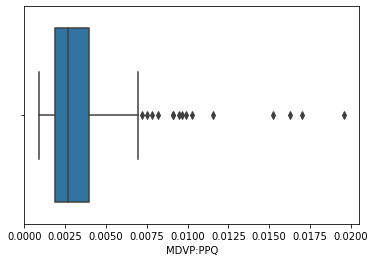

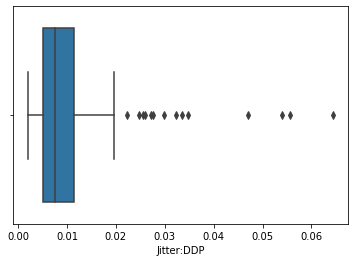

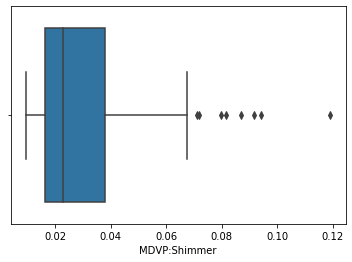

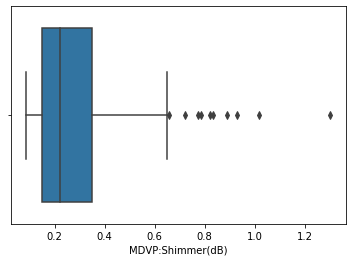

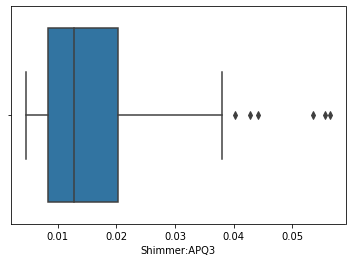

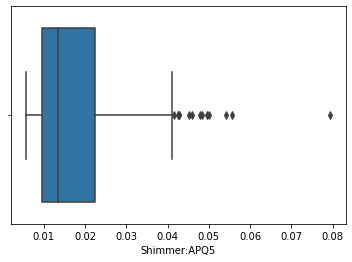

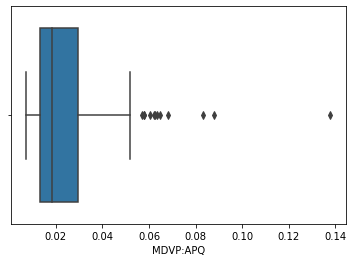

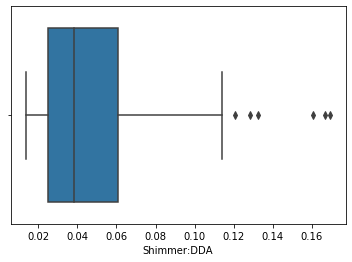

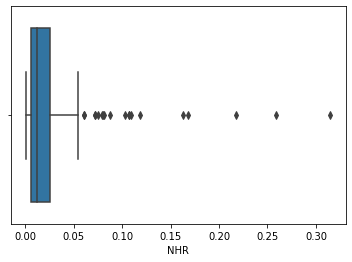

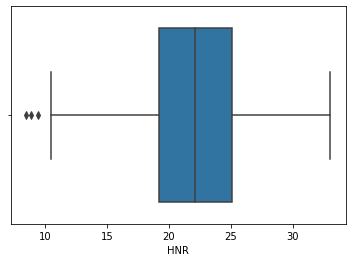

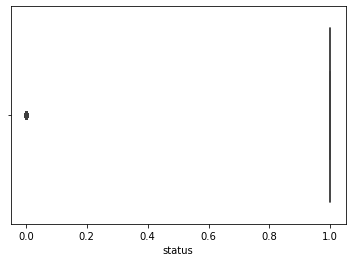

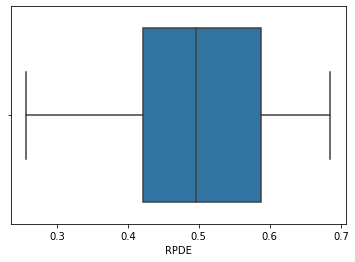

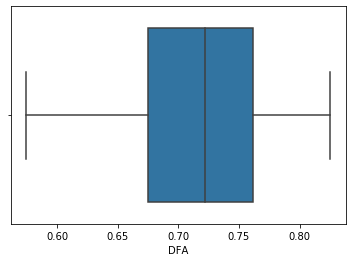

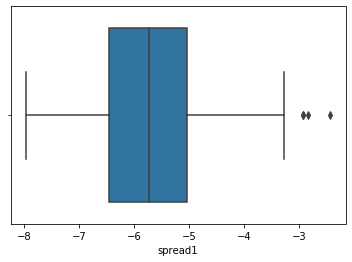

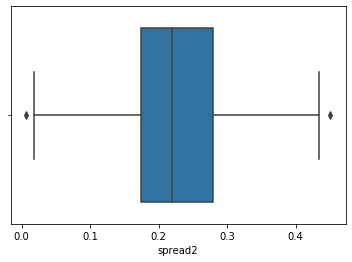

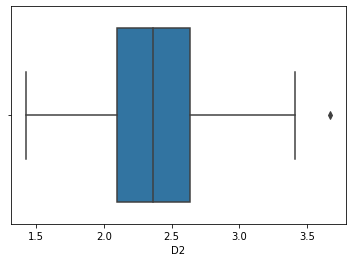

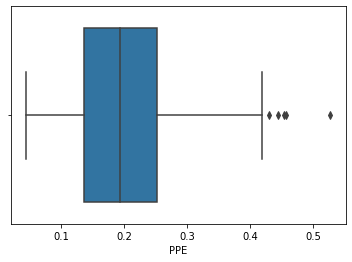

In [15]:
for i in df.columns:
    sns.boxplot(df[i])
    
    plt.show()

As we can see many Features are affected by Outliers and has high skewness

In [85]:
x=df.drop(columns='status')
y=df.status
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [69]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [86]:
pt = PowerTransformer()
pt2=PowerTransformer('box-cox')

    

Transforming 1st 2 Features with Box-cox because yeo-johnson method removes out the spread of data and converts all values in 1st 2 Features to 0 so to avoid that doing Box-cox.

Remaining Features from 3rd to last Feature is done with yeo-johnson method because boxcox cannot be applied for negative values

In [87]:
x_train_pt=pt.fit_transform(x_train.iloc[:,2:])
x_test_pt=pt.transform(x_test.iloc[:,2:])

x_train_pt2 = pt2.fit_transform(x_train.iloc[:,:2])
x_test_pt2  = pt2.transform(x_test.iloc[:,:2])

x_train_new=np.append(x_train_pt2,x_train_pt,axis=1)
x_test_new=np.append(x_test_pt2,x_test_pt,axis=1)

In [91]:
xtp=pd.DataFrame(x_train_new)
xtp.columns=x.columns

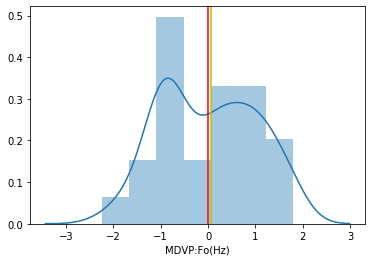

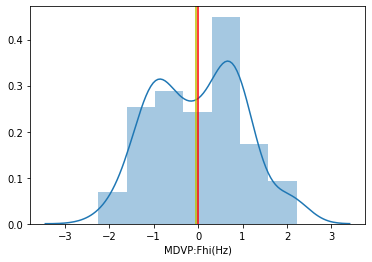

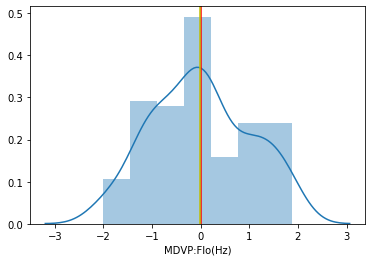

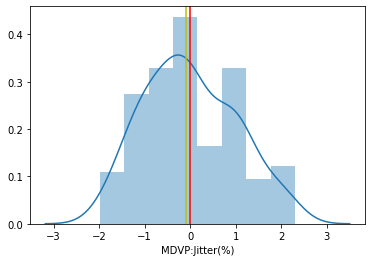

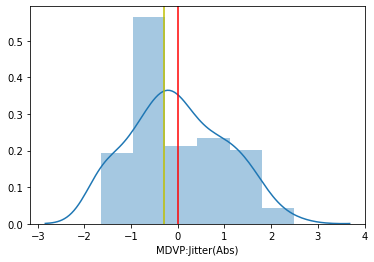

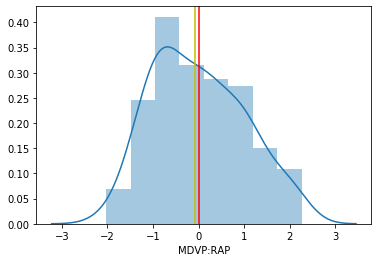

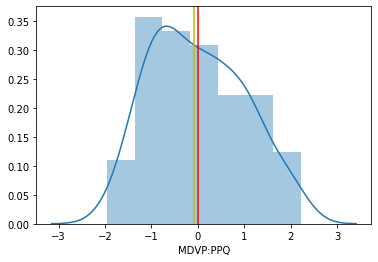

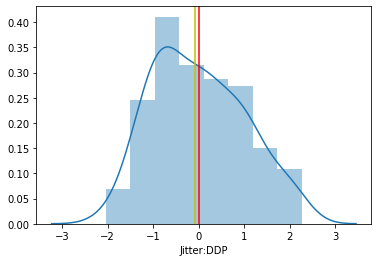

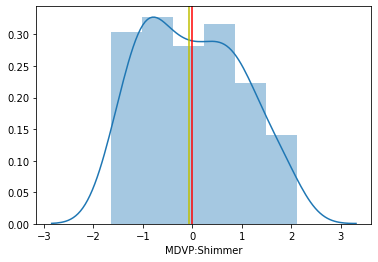

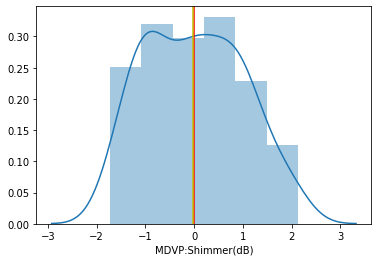

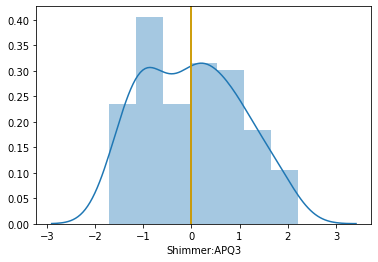

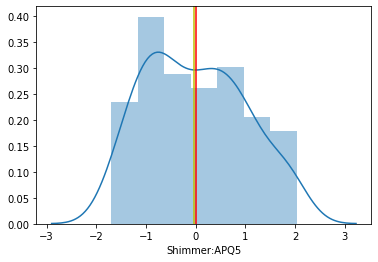

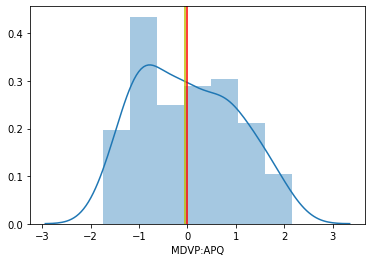

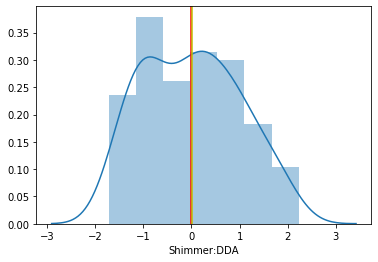

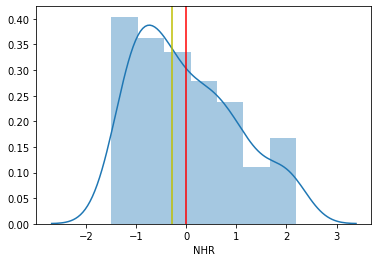

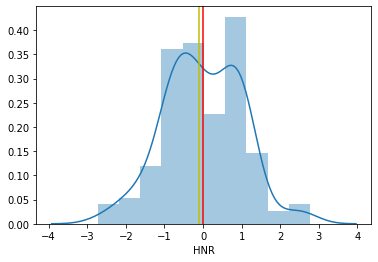

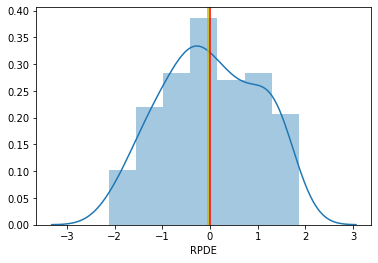

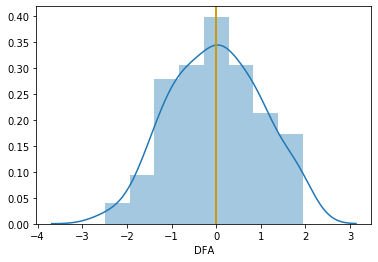

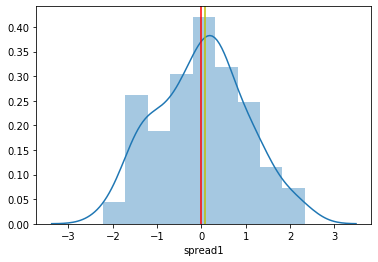

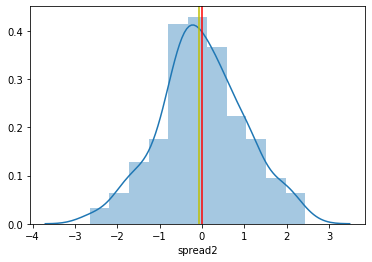

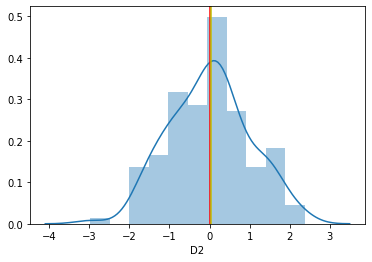

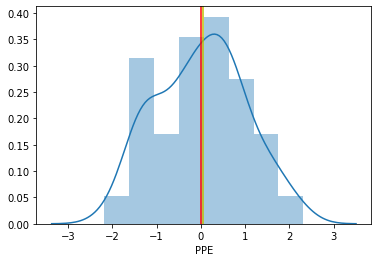

In [92]:
for i in xtp.columns:
    sns.distplot(xtp[i])
    plt.axvline(xtp[i].mean(),color='r')
    plt.axvline(xtp[i].median(),color='y')
    plt.show()

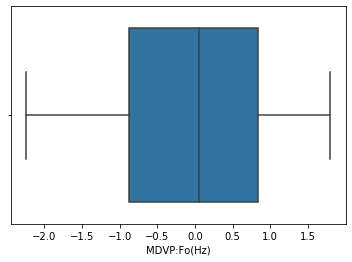

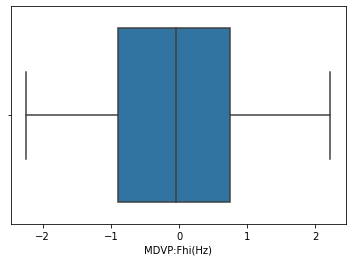

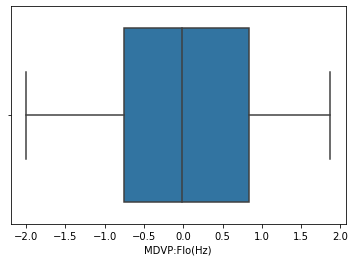

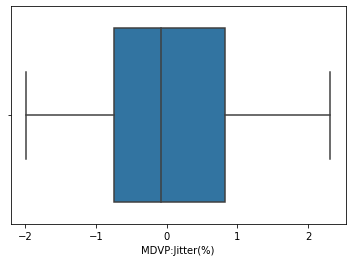

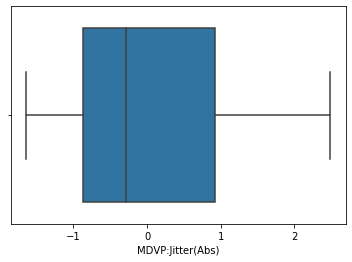

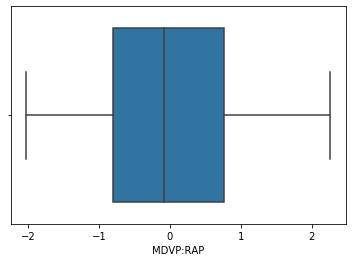

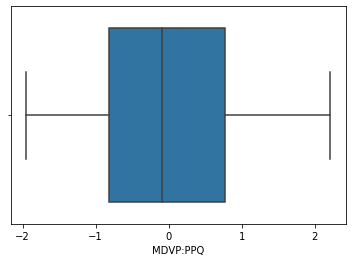

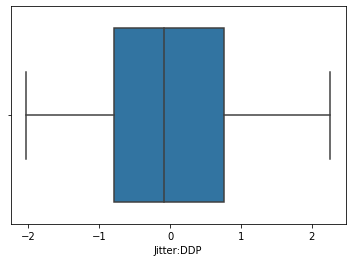

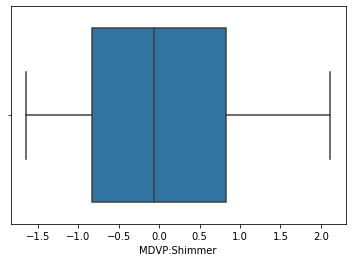

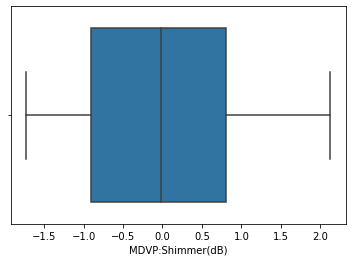

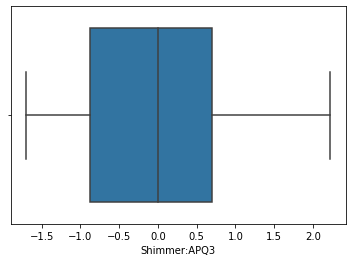

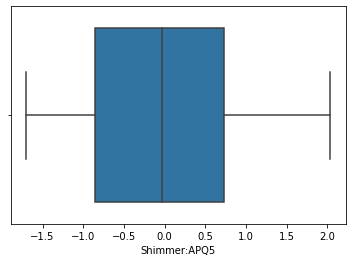

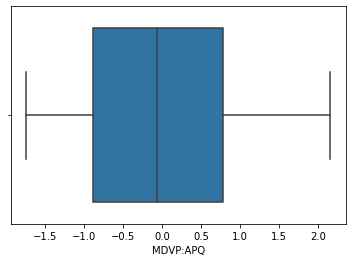

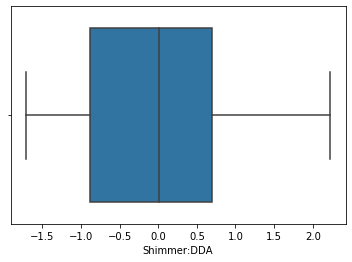

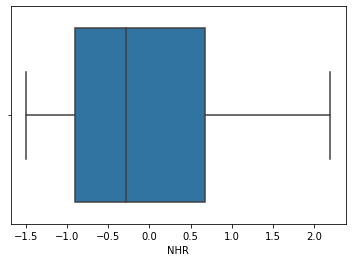

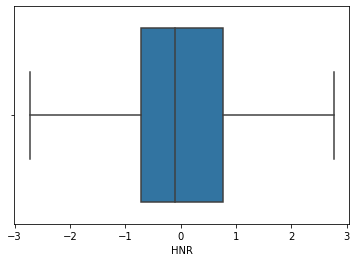

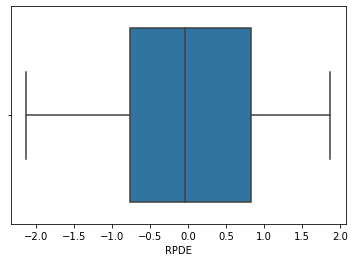

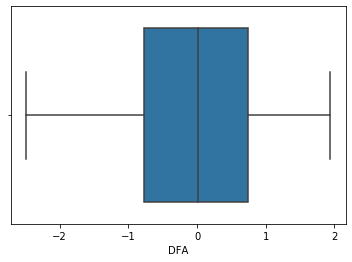

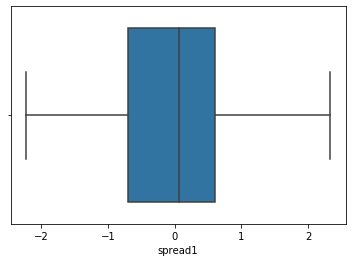

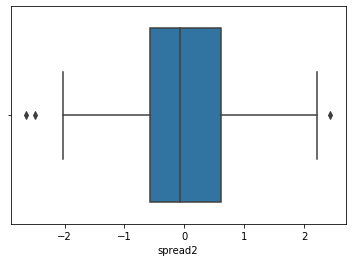

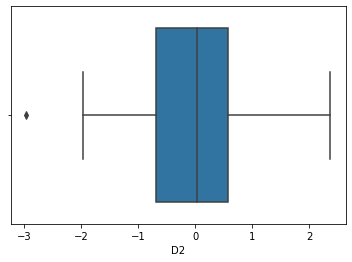

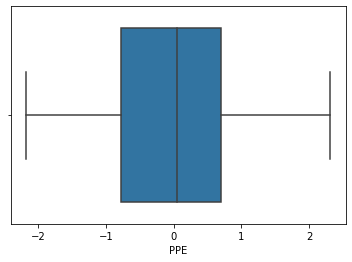

In [95]:
for i in xtp.columns:
    sns.boxplot(xtp[i])
    
    plt.show()

Now the Data has been perfectly Normalized and almost all outliers have been handled

## FEATURE SELECTION

## Lets check the Correlation among the Features

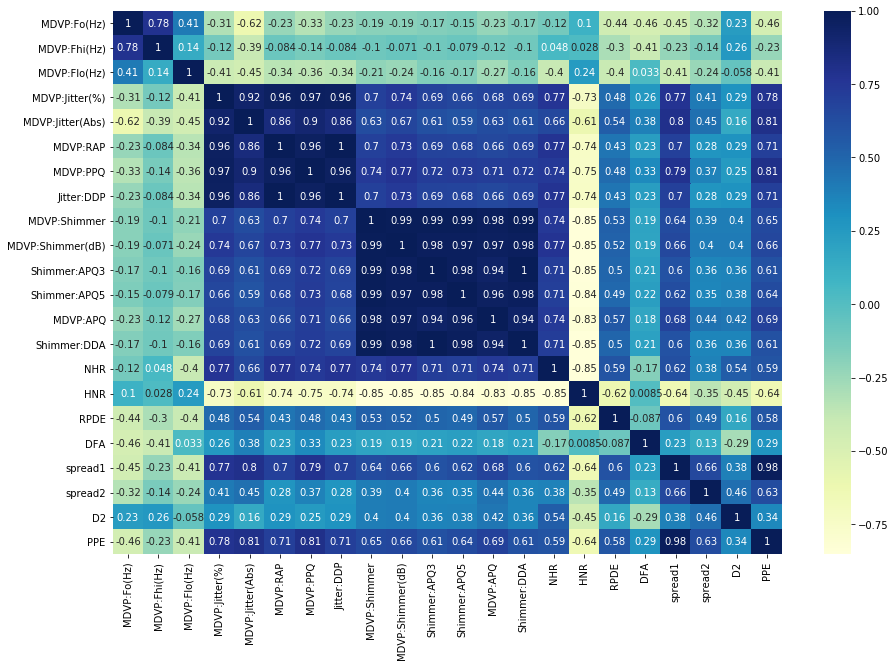

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(xtp.corr(),cmap="YlGnBu",annot=True)

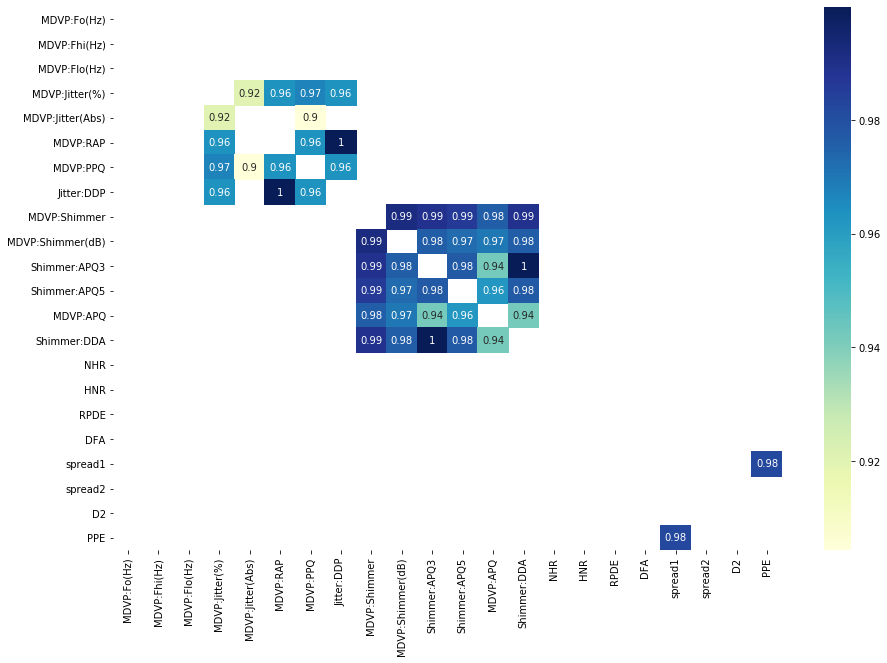

In [142]:
plt.figure(figsize=(15,10))
xcorr=pd.DataFrame(xtp.corr())
sns.heatmap(xcorr[((xcorr>0.9)|(xcorr<-0.9))&(abs(xcorr)!=1)],cmap="YlGnBu",annot=True)

In [143]:
xcorr[((xcorr>0.9)|(xcorr<-0.9))&(abs(xcorr)!=1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,NaN,0.920608,0.963362,0.967122,0.963378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(Abs),NaN,NaN,NaN,0.920608,NaN,NaN,0.904297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,NaN,NaN,NaN,0.963362,NaN,NaN,0.963417,0.999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,NaN,NaN,NaN,0.967122,0.904297,0.963417,NaN,0.963488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,NaN,NaN,NaN,0.963378,NaN,0.999997,0.963488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991921,0.989474,0.986315,0.976147,0.989425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer(dB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991921,NaN,0.975763,0.972831,0.969820,0.975774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we cana see there are multiple features with high correlation

In [151]:
def correlation(dataset,threshold):
    col_corr=set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [163]:
corr_feats = correlation(xtp,0.5) #considering Threshold has 0.5 since there are only 22 Features
corr_feats

{'D2',
 'HNR',
 'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Fhi(Hz)',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'RPDE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'spread1',
 'spread2'}

In [170]:
len(corr_feats)

18

In [188]:
xtp=xtp[corr_feats]
xtp.shape

(136, 18)

In [186]:
x_test_new=pd.DataFrame(x_test_new,columns=x.columns)
x_test_new=x_test_new[corr_feats]
x_test_new.shape

(59, 18)

### Since we have numerical features as input and categorical as output we are going for Anova

In [112]:
xtp.shape

(136, 22)

Univariate Analysis

In [118]:
from sklearn.feature_selection import SelectKBest,f_classif

In [175]:
ordered_rank_features=SelectKBest(score_func=f_classif,k=18)
ordered_feature=ordered_rank_features.fit(xtp[corr_feats],y_train)

In [176]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Scores'])
dfscores['Features']=xtp[corr_feats].columns
dfscores.nlargest(18,'Scores')

,Scores,Features
8,81.424546,spread1
4,81.033031,PPE
6,38.920594,MDVP:APQ
10,36.278826,MDVP:Jitter(Abs)
16,34.981130,spread2
7,28.402071,MDVP:PPQ
17,28.311675,MDVP:Shimmer(dB)
5,27.374951,MDVP:Shimmer
13,24.997971,Shimmer:APQ5
11,24.514940,Jitter:DDP


## Lets also try with Recursive feature Elimination method

In [124]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [177]:
lor=LogisticRegression(solver='liblinear',fit_intercept=True)
rfe=RFECV(estimator=lor)
rfe_mod=rfe.fit(xtp[corr_feats],y_train)
dfscores_rfecv=pd.DataFrame(rfe_mod.ranking_,columns=['Scores'])
dfscores_rfecv['Features']=xtp[corr_feats].columns
dfscores_rfecv.nlargest(18,'Scores')

,Scores,Features
3,7,RPDE
5,6,MDVP:Shimmer
12,5,MDVP:Fhi(Hz)
13,4,Shimmer:APQ5
17,3,MDVP:Shimmer(dB)
10,2,MDVP:Jitter(Abs)
16,1,spread2
15,1,MDVP:RAP
14,1,Shimmer:APQ3
11,1,Jitter:DDP


In [179]:
pd.merge(dfscores,dfscores_rfecv,on='Features').nlargest(18,'Scores_y')

,Scores_x,Features,Scores_y
3,21.586553,RPDE,7
5,27.374951,MDVP:Shimmer,6
12,4.440407,MDVP:Fhi(Hz),5
13,24.997971,Shimmer:APQ5,4
17,28.311675,MDVP:Shimmer(dB),3
10,36.278826,MDVP:Jitter(Abs),2
16,34.981130,spread2,1
15,24.472518,MDVP:RAP,1
14,20.736318,Shimmer:APQ3,1
11,24.514940,Jitter:DDP,1


## Logistic Regression

In [201]:
logreg=LogisticRegression(solver='liblinear',fit_intercept=True) 
#fit_intercept = True = add_constant automatically
#solver = kind of numerical algorithm to find coeffs liblinear is more like statistics it wont have convergence issue
logreg.fit(xtp,y_train)
y_train_pred=logreg.predict(xtp)

y_train_prob=logreg.predict_proba(xtp)[:,-1] #Gives probablity of 0 and 1 ... we need only prob of 1 so do slicing

np.unique(y_train_pred) # 0,1 only -default cutoff 0.5
y_train_prob

y_test_pred=logreg.predict(x_test_new)

y_test_prob=logreg.predict_proba(x_test_new)[:,-1] #Gives probablity of 0 and 1 ... we need only prob of 1 so do slicing

#np.unique(y_test_pred) # 0,1 only -default cutoff 0.5
#y_train_prob,y_test_prob



(array([0.83906565, 0.57062432, 0.99045158, 0.95003761, 0.74616551,
        0.98742703, 0.98322876, 0.87881101, 0.99815287, 0.55066683,
        0.76144538, 0.97771165, 0.99984791, 0.95489247, 0.87787205,
        0.99773285, 0.3766721 , 0.69435912, 0.95734043, 0.9697892 ,
        0.99931772, 0.93874298, 0.99160156, 0.09078962, 0.11184368,
        0.15651175, 0.40745139, 0.94151581, 0.11401509, 0.19135999,
        0.9683419 , 0.0562188 , 0.82741453, 0.28008528, 0.98447806,
        0.94240362, 0.22363275, 0.66938711, 0.9743863 , 0.69510627,
        0.97207403, 0.94229841, 0.83883674, 0.30430991, 0.36653549,
        0.9969297 , 0.86063162, 0.97093647, 0.40383955, 0.99966909,
        0.85474482, 0.92779068, 0.95091303, 0.51606159, 0.73874709,
        0.88625261, 0.67685963, 0.86695277, 0.99615207, 0.99697699,
        0.99676686, 0.83933441, 0.30358975, 0.80267925, 0.56241545,
        0.98526806, 0.95300031, 0.99990992, 0.59746512, 0.09516475,
        0.50290598, 0.99904558, 0.97378448, 0.95

In [202]:
print('confusion Matrix \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score',accuracy_score(y_train,y_train_pred))
print('     AUC      - Train :',roc_auc_score(y_train,y_train_prob))

print()
print('Confusion Matrix - Test\n',confusion_matrix(y_test,y_test_pred))
print('AccuracyScore - Test :',accuracy_score(y_test,y_test_pred))
print('     AUC      - Test :',roc_auc_score(y_test,y_test_prob))


confusion Matrix 
 [[23  9]
 [ 5 99]]
Accuracy Score 0.8970588235294118
     AUC      - Train : 0.9516225961538461

Confusion Matrix - Test
 [[10  6]
 [ 2 41]]
AccuracyScore - Test : 0.864406779661017
     AUC      - Test : 0.8822674418604651


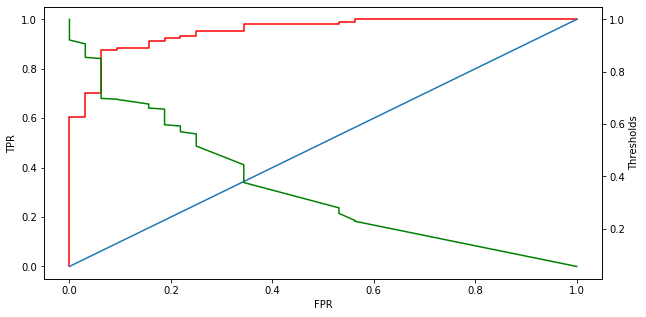

In [203]:
fpr,tpr,threshold=roc_curve(y_train,y_train_prob)

roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':threshold})
roc.head() 
#ideally threshold (probability) starts from 0-1 .. 1.86 appx= 1 ... with 1.86 system got fpr=tpr=0
#THRESHOLD = CUTOFFS...  Starting from 1 to 0 
#1.86 so plotting will mess up so -1
threshold[0]=threshold[0]-1

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr,'r')
ax.plot(fpr,fpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx() #sharing x-axis and creating another y axis for threshold
ax1.plot(fpr,threshold,'g') #Threshold
ax1.set_ylabel('Thresholds')


plt.show()

## Hyper Parameter Tuning

In [232]:
logreg=LogisticRegression(fit_intercept=True)

param_dist = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','saga']}

rsearch_lor = RandomizedSearchCV(logreg,param_distributions=param_dist,n_iter=50,scoring='roc_auc',cv=3,random_state=42,
                             return_train_score=True)
rsearch_lor.fit(xtp,y_train)

C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [233]:
rsearch_lor.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 29.763514416313132}

In [234]:
lor= LogisticRegression(**rsearch_lor.best_params_)
lor.fit(xtp,y_train)
y_train_pred=lor.predict(xtp)
y_train_prob=lor.predict_proba(xtp)[:,1]

y_test_pred=lor.predict(x_test_new)
y_test_prob=lor.predict_proba(x_test_new)[:,1]

print('Confusion Matrix - Train\n',confusion_matrix(y_train,y_train_pred))
print('AccuracyScore - Train :',accuracy_score(y_train,y_train_pred))
print('     AUC      - Train :',roc_auc_score(y_train,y_train_prob))

print()
print('Confusion Matrix - Test\n',confusion_matrix(y_test,y_test_pred))
print('AccuracyScore - Test :',accuracy_score(y_test,y_test_pred))
print('     AUC      - Test :',roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train
 [[ 26   6]
 [  2 102]]
AccuracyScore - Train : 0.9411764705882353
     AUC      - Train : 0.9735576923076923

Confusion Matrix - Test
 [[10  6]
 [ 3 40]]
AccuracyScore - Test : 0.847457627118644
     AUC      - Test : 0.8880813953488371


There is No Improvement in Logistic Regression even with Tuning so lets Try with different algorithm

## RandomForest

In [208]:
x_train=xtp.copy()
x_test=x_test_new.copy()

In [198]:
from sklearn.ensemble import RandomForestClassifier


In [235]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_train_prob=rf.predict_proba(x_train)[:,1]

y_test_pred=rf.predict(x_test)
y_test_prob=rf.predict_proba(x_test)[:,1]

print('Confusion Matrix of Train : \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy of Train : ',accuracy_score(y_train,y_train_pred))
print('AUC of Train : ',roc_auc_score(y_train,y_train_prob))

print()
print('Confusion Matrix of Train : \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy of Train : ',accuracy_score(y_test,y_test_pred))
print('AUC of Train : ',roc_auc_score(y_test,y_test_prob))


Confusion Matrix of Train : 
 [[ 32   0]
 [  0 104]]
Accuracy of Train :  1.0
AUC of Train :  1.0

Confusion Matrix of Train : 
 [[10  6]
 [ 0 43]]
Accuracy of Train :  0.8983050847457628
AUC of Train :  0.9273255813953488


The Model is heavily Overfitted

In [259]:
from scipy.stats import randint as sp_randint

rf=RandomForestClassifier(random_state=42)

params={'n_estimators':sp_randint(50,200),
       'max_depth':sp_randint(1,10),
       'max_features':sp_randint(1,15),
       'min_samples_leaf':sp_randint(1,20),
       'min_samples_split':sp_randint(2,20),
       'criterion':['gini','entropy']}

rsearch_rf=RandomizedSearchCV(rf,param_distributions=params,n_iter=50,
                           cv=3,random_state=42,scoring='roc_auc')

rsearch_rf.fit(x_train,y_train)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EB84FC588>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EB84FC908>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EB838BF98>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EB838B470>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EB84FC1D0>},
                   random_state=42, scoring='roc_auc')

In [227]:
rsearch_rf.estimator.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [237]:
rsearch_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 137}

In [226]:
rf=RandomForestClassifier(random_state=42,**rsearch_rf.best_params_)
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_train_prob=rf.predict_proba(x_train)[:,1]

y_test_pred=rf.predict(x_test)
y_test_prob=rf.predict_proba(x_test)[:,1]

print('Confusion Matrix of Train : \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy of Train : ',accuracy_score(y_train,y_train_pred))
print('AUC of Train : ',roc_auc_score(y_train,y_train_prob))

print()
print('Confusion Matrix of test : \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy of test : ',accuracy_score(y_test,y_test_pred))
print('AUC of test : ',roc_auc_score(y_test,y_test_prob))


Confusion Matrix of Train : 
 [[ 30   2]
 [  0 104]]
Accuracy of Train :  0.9852941176470589
AUC of Train :  0.9978966346153846

Confusion Matrix of test : 
 [[ 9  7]
 [ 2 41]]
Accuracy of test :  0.847457627118644
AUC of test :  0.9055232558139534


In [213]:
# Feature Importance
imp=pd.DataFrame(rf.feature_importances_,index=xtp.columns,columns=['Importance'])
imp.sort_values('Importance',ascending=False)

,Importance
spread1,0.197602
PPE,0.160530
D2,0.063462
MDVP:PPQ,0.061011
spread2,0.060182
NHR,0.052997
Shimmer:APQ5,0.052647
MDVP:Fhi(Hz),0.050175
MDVP:APQ,0.039077
RPDE,0.037529


## Stacking

In [228]:
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb


In [262]:
lor=LogisticRegression(**rsearch_lor.best_params_)
rf=RandomForestClassifier(**rsearch_rf.best_params_)
lgbmc=lgb.LGBMClassifier(random_state=4)



In [264]:
estimators = [('lor',lor),('rf',rf),('lgbmc',lgbmc)]

clf = VotingClassifier(estimators=estimators,voting='soft')
# voting = soft --> will create predicted probs for all 'estimators' algos and will calculate average of those 
                    # predicted probablities and that is the predicted probablility (clf.predict_proba) 
                    # for every observation then 0.5 cutoff is applied
# voting = hard --> 

clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_train_prob = clf.predict_proba(x_train)[:,1]

y_test_pred = clf.predict(x_test)
y_test_prob = clf.predict_proba(x_test)[:,1]

print('Confusion Matrix of Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Accuracy of Train: ', accuracy_score(y_train, y_train_pred))
print('AUC of Train: ', roc_auc_score(y_train, y_train_prob))

print('\n')
print('Confusion Matrix of Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Accuracy of Test: ', accuracy_score(y_test, y_test_pred))
print('AUC of Test: ', roc_auc_score(y_test, y_test_prob))



Confusion Matrix of Train:  
 [[ 31   1]
 [  0 104]]
Accuracy of Train:  0.9926470588235294
AUC of Train:  1.0


Confusion Matrix of Test:  
 [[11  5]
 [ 1 42]]
Accuracy of Test:  0.8983050847457628
AUC of Test:  0.9215116279069767


## Light GBM

In [254]:
import lightgbm as lgb
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(x_train,y_train)


y_train_pred=lgbmc.predict(x_train)
y_train_prob=lgbmc.predict_proba(x_train)[:,1]

y_test_pred=lgbmc.predict(x_test)
y_test_prob=lgbmc.predict_proba(x_test)[:,1]

print('Confusion Matrix of Train : \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy of Train : ',accuracy_score(y_train,y_train_pred))
print('AUC of Train : ',roc_auc_score(y_train,y_train_prob))

print()
print('Confusion Matrix of test : \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy of test : ',accuracy_score(y_test,y_test_pred))
print('AUC of test : ',roc_auc_score(y_test,y_test_prob))


Confusion Matrix of Train : 
 [[ 32   0]
 [  0 104]]
Accuracy of Train :  1.0
AUC of Train :  1.0

Confusion Matrix of test : 
 [[12  4]
 [ 1 42]]
Accuracy of test :  0.9152542372881356
AUC of test :  0.9491279069767442


### Out of all algorithms Light Gbm does pretty well